In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
##Display all the columns in Data Frame

pd.pandas.set_option('display.max_columns',None) 

In [2]:
df=pd.read_csv(r'C:\Users\Mizgaan Masani\Downloads\train_set.csv')

# 1) Performing EDA Before Cleaning the Data

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,380337,Male,30,1,28.0,1,< 1 Year,No,60954.0,152.0,127,0
1,282196,Male,26,1,6.0,1,< 1 Year,No,24532.0,152.0,216,0
2,60095,Male,40,1,0.0,0,1-2 Year,Yes,2630.0,47.0,220,0
3,124730,Male,25,1,8.0,1,< 1 Year,No,44259.0,152.0,223,0
4,474060,Female,26,1,28.0,1,< 1 Year,No,33615.0,152.0,194,0


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000
mean,234422.768922,38.527029,0.998106,26.427413,0.489878,30698.991479,111.927369,154.317362,0.163413
std,139493.010325,15.216020,0.043477,13.178366,0.499898,17060.104811,54.302872,83.708893,0.369742
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115055.000000,25.000000,1.000000,15.000000,0.000000,24533.500000,26.000000,82.000000,0.000000
50%,230662.000000,36.000000,1.000000,28.000000,0.000000,31685.000000,145.000000,154.000000,0.000000
75%,345313.500000,49.000000,1.000000,35.000000,1.000000,39425.000000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
df.shape

(305723, 12)

In [6]:
# df['Response'].value_counts().to_dict()
(df.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

## Checking Missing Vlaues

In [7]:
df_feature_null=[feat for feat in df.columns if df[feat].isnull().sum()>1]
print(f'Number of features having Missing values are:- {len(df_feature_null)}')

if len(df_feature_null)!=0:
    for feat in df_feature_null:
        print(f'Feature :- {feat} is having {np.round(df_feature_null[feat].isnull().mean(),4)} % of Missing values')
        
else:
    print('There are No Missing Values')

Number of features having Missing values are:- 0
There are No Missing Values


## Understanding the Data for Numerical Features

In [8]:
df_numeric=[feat for feat in df.columns if df[feat].dtypes !='O']
print(f'Number of Numerical features are:- {len(df_numeric)}')
data_num=df[df_numeric].copy()


Number of Numerical features are:- 9


In [9]:
data_num.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,380337,30,1,28.0,1,60954.0,152.0,127,0
1,282196,26,1,6.0,1,24532.0,152.0,216,0
2,60095,40,1,0.0,0,2630.0,47.0,220,0
3,124730,25,1,8.0,1,44259.0,152.0,223,0
4,474060,26,1,28.0,1,33615.0,152.0,194,0


## Finding the Correlation between the Numerical features

In [10]:
# data_num.drop(['id'],axis=1)

<AxesSubplot:>

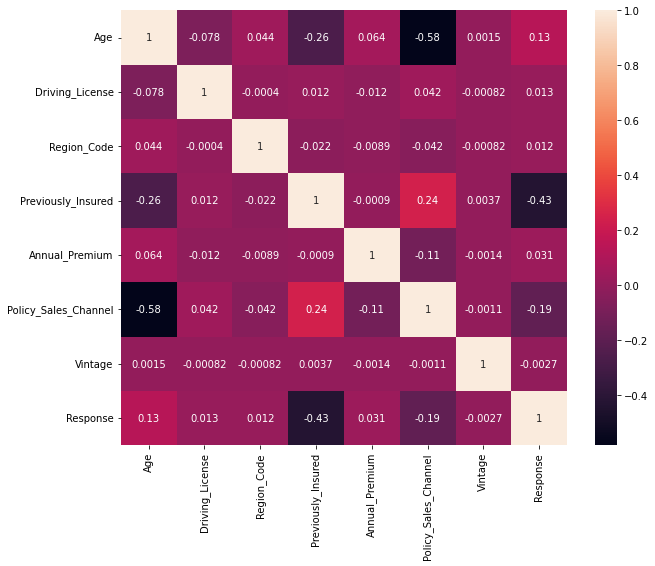

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data_num.drop(['id'],axis=1).corr(),annot=True)

Correlation between:- Age & Driving_License Is:---> -0.0775


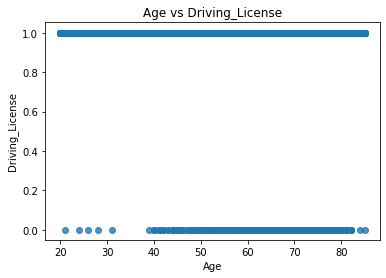

Correlation between:- Age & Region_Code Is:---> 0.0438


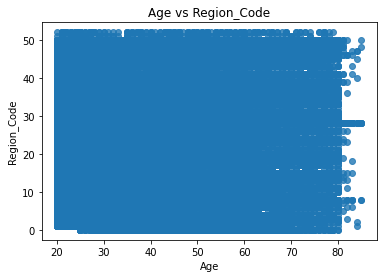

Correlation between:- Age & Previously_Insured Is:---> -0.2639


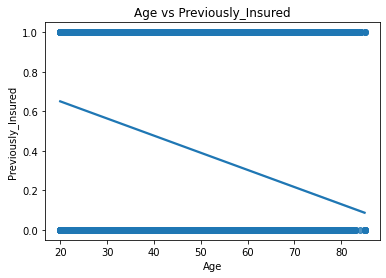

Correlation between:- Age & Annual_Premium Is:---> 0.0644


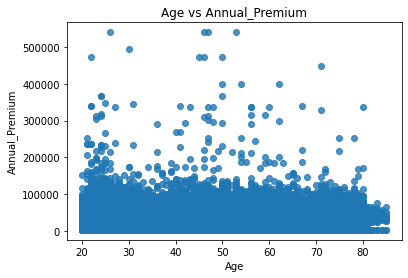

Correlation between:- Age & Policy_Sales_Channel Is:---> -0.5827


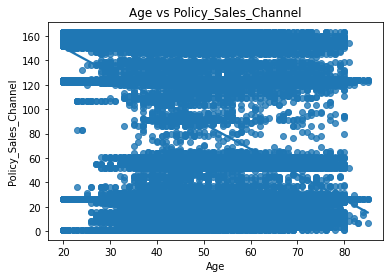

Correlation between:- Age & Vintage Is:---> 0.0015


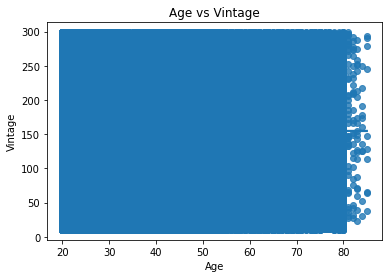

Correlation between:- Age & Response Is:---> 0.1339


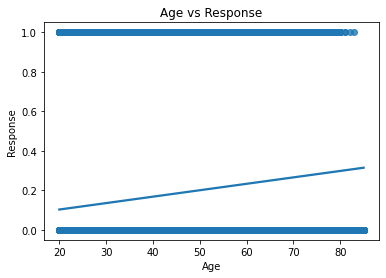

Correlation between:- Driving_License & Age Is:---> -0.0775


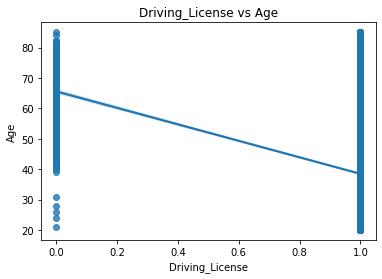

Correlation between:- Driving_License & Region_Code Is:---> -0.0004


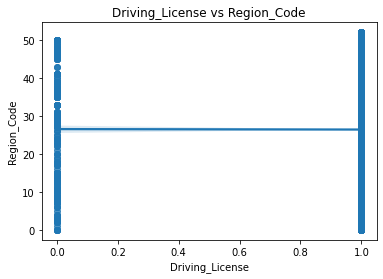

Correlation between:- Driving_License & Previously_Insured Is:---> 0.0123


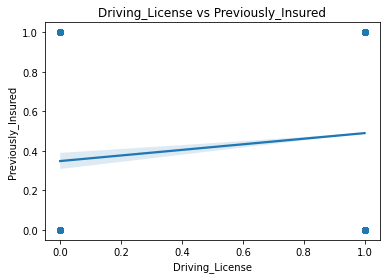

Correlation between:- Driving_License & Annual_Premium Is:---> -0.0116


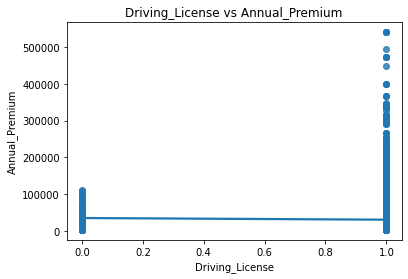

Correlation between:- Driving_License & Policy_Sales_Channel Is:---> 0.0417


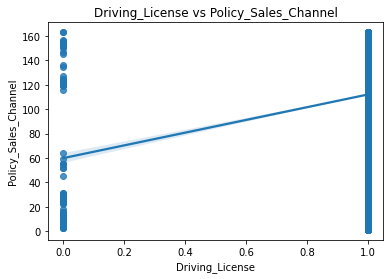

Correlation between:- Driving_License & Vintage Is:---> -0.0008


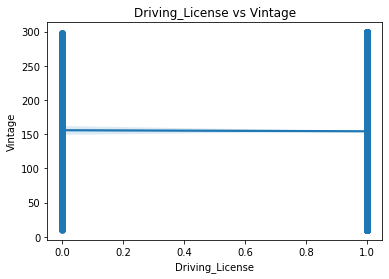

Correlation between:- Driving_License & Response Is:---> 0.0129


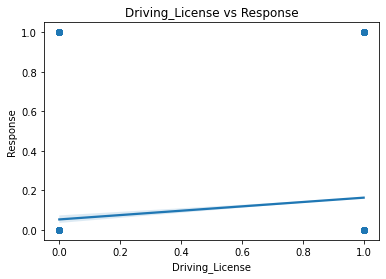

Correlation between:- Region_Code & Age Is:---> 0.0438


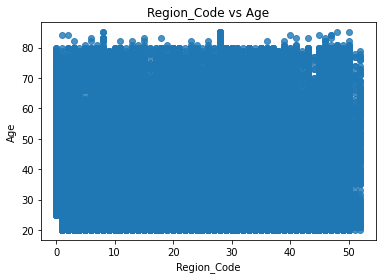

Correlation between:- Region_Code & Driving_License Is:---> -0.0004


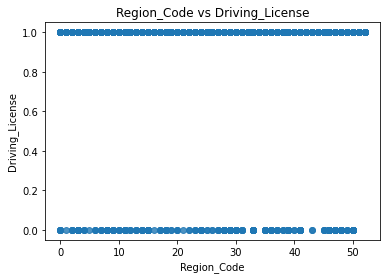

Correlation between:- Region_Code & Previously_Insured Is:---> -0.022


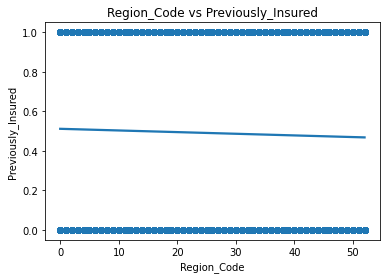

Correlation between:- Region_Code & Annual_Premium Is:---> -0.0089


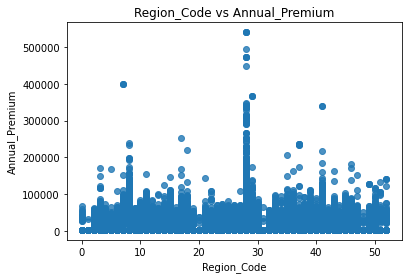

Correlation between:- Region_Code & Policy_Sales_Channel Is:---> -0.0421


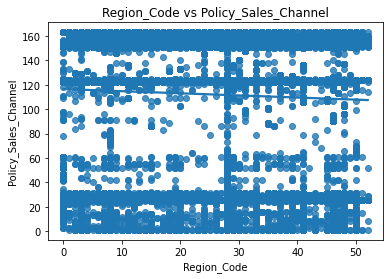

Correlation between:- Region_Code & Vintage Is:---> -0.0008


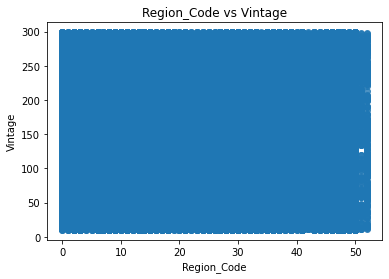

Correlation between:- Region_Code & Response Is:---> 0.0117


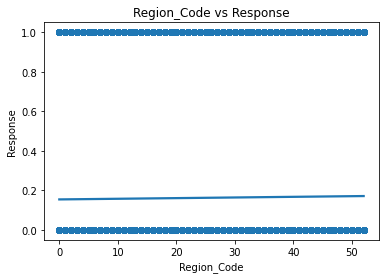

Correlation between:- Previously_Insured & Age Is:---> -0.2639


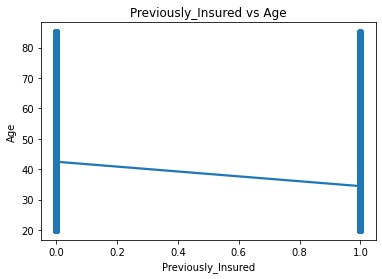

Correlation between:- Previously_Insured & Driving_License Is:---> 0.0123


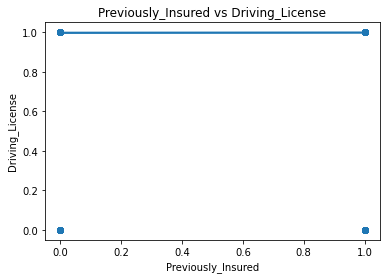

Correlation between:- Previously_Insured & Region_Code Is:---> -0.022


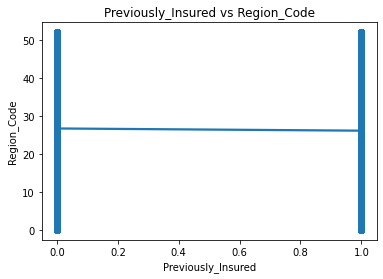

Correlation between:- Previously_Insured & Annual_Premium Is:---> -0.0009


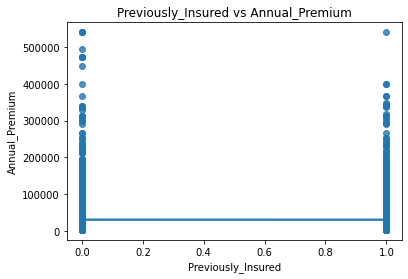

Correlation between:- Previously_Insured & Policy_Sales_Channel Is:---> 0.2412


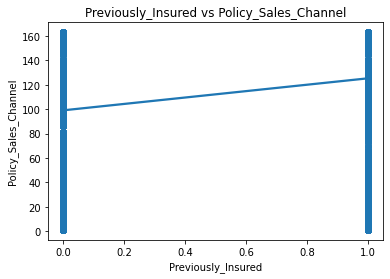

Correlation between:- Previously_Insured & Vintage Is:---> 0.0037


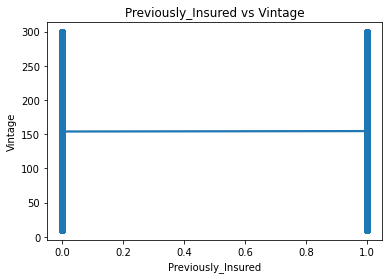

Correlation between:- Previously_Insured & Response Is:---> -0.4313


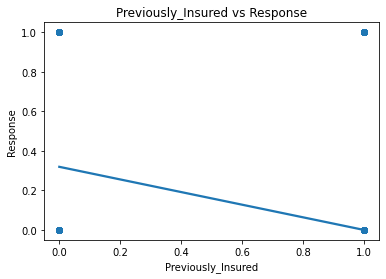

Correlation between:- Annual_Premium & Age Is:---> 0.0644


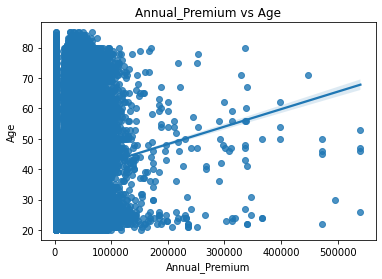

Correlation between:- Annual_Premium & Driving_License Is:---> -0.0116


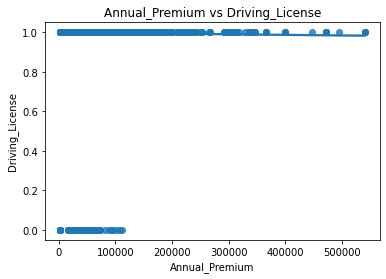

Correlation between:- Annual_Premium & Region_Code Is:---> -0.0089


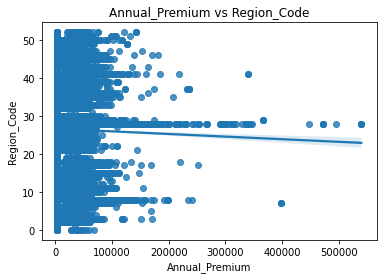

Correlation between:- Annual_Premium & Previously_Insured Is:---> -0.0009


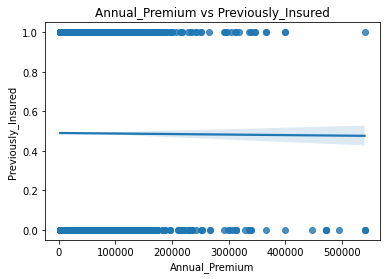

Correlation between:- Annual_Premium & Policy_Sales_Channel Is:---> -0.1132


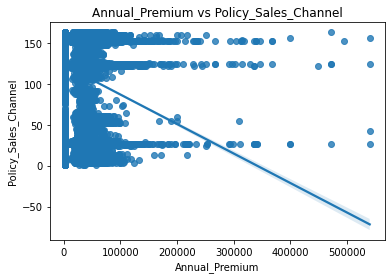

Correlation between:- Annual_Premium & Vintage Is:---> -0.0014


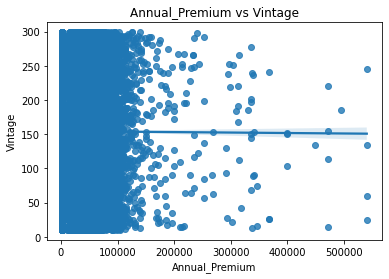

Correlation between:- Annual_Premium & Response Is:---> 0.0306


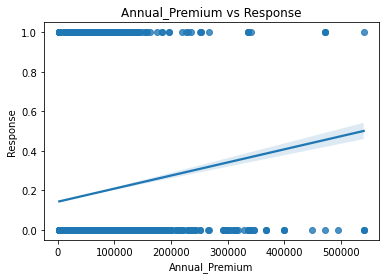

Correlation between:- Policy_Sales_Channel & Age Is:---> -0.5827


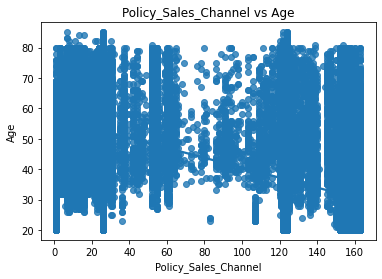

Correlation between:- Policy_Sales_Channel & Driving_License Is:---> 0.0417


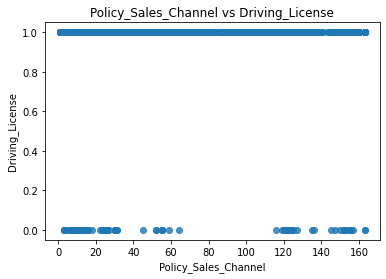

Correlation between:- Policy_Sales_Channel & Region_Code Is:---> -0.0421


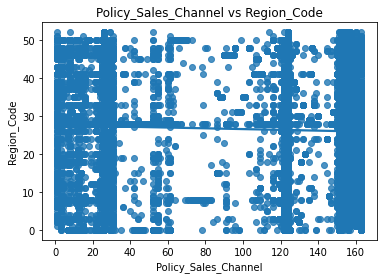

Correlation between:- Policy_Sales_Channel & Previously_Insured Is:---> 0.2412


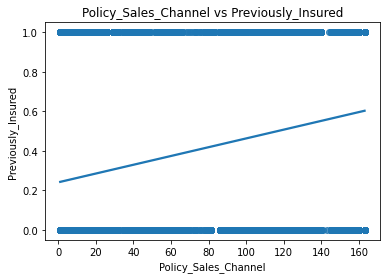

Correlation between:- Policy_Sales_Channel & Annual_Premium Is:---> -0.1132


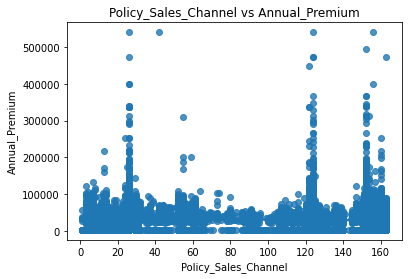

Correlation between:- Policy_Sales_Channel & Vintage Is:---> -0.0011


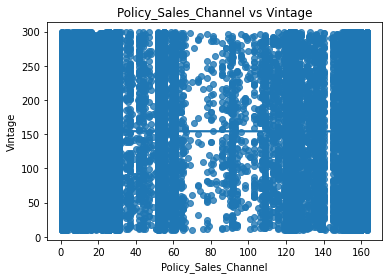

Correlation between:- Policy_Sales_Channel & Response Is:---> -0.1851


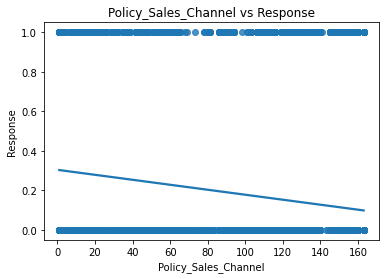

Correlation between:- Vintage & Age Is:---> 0.0015


KeyboardInterrupt: 

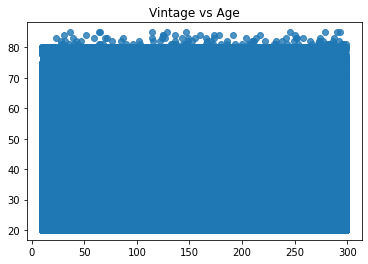

In [12]:
for i,col_1 in enumerate(data_num.drop(['id'],axis=1)):
    for j,col_2 in enumerate(data_num.drop(['id'],axis=1)):
        
        if col_1 !=col_2:
            plt.figure(i)
            plt.title(col_1+" vs "+col_2)
            print(f'Correlation between:- {col_1} & {col_2} Is:---> {np.round(data_num[col_1].corr(data_num[col_2]),4)}')
            sns.regplot(x=data_num[col_1],y=data_num[col_2])
            plt.show()

## Plotted the Numerical Features with respect to Response

Correlation between:- Age & Response Is:---> 0.0015


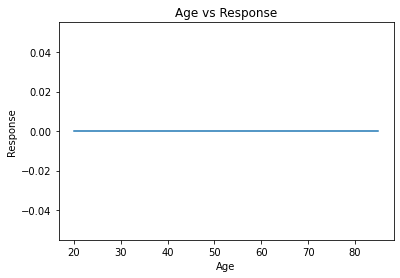

Correlation between:- Driving_License & Response Is:---> 0.0015


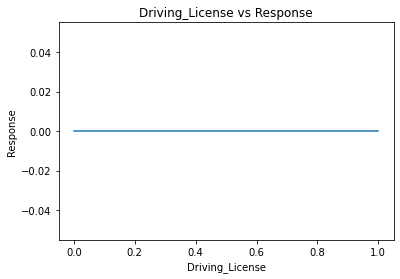

Correlation between:- Region_Code & Response Is:---> 0.0015


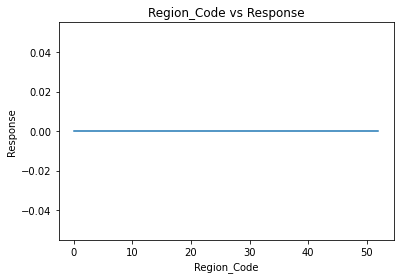

Correlation between:- Previously_Insured & Response Is:---> 0.0015


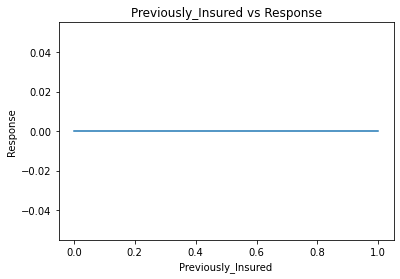

Correlation between:- Annual_Premium & Response Is:---> 0.0015


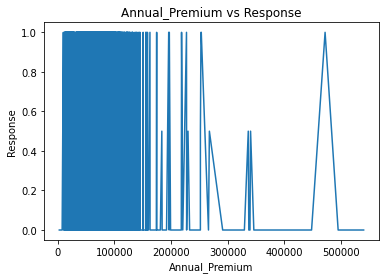

Correlation between:- Policy_Sales_Channel & Response Is:---> 0.0015


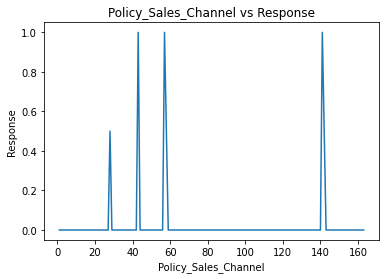

Correlation between:- Vintage & Response Is:---> 0.0015


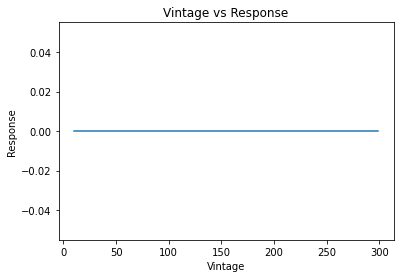

Correlation between:- Response & Response Is:---> 0.0015


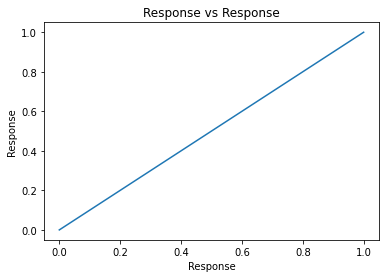

In [13]:
data_numeric=data_num.drop(['id'],axis=1)
for feat in data_num.drop(['id'],axis=1):
    data_numeric.groupby(feat)['Response'].median().plot()
    plt.title(feat+" vs Response")
    plt.xlabel(feat)
    plt.ylabel('Response')
    print(f'Correlation between:- {feat} & Response Is:---> {np.round(data_num[col_1].corr(data_num[col_2]),4)}')
    plt.show()

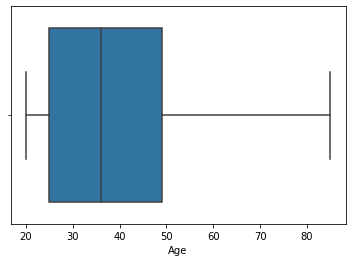

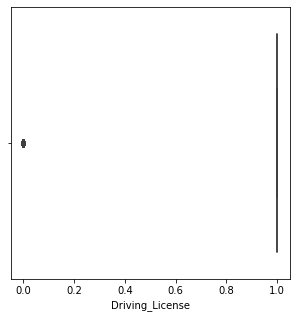

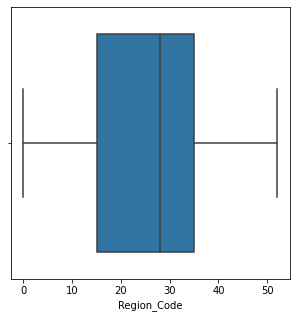

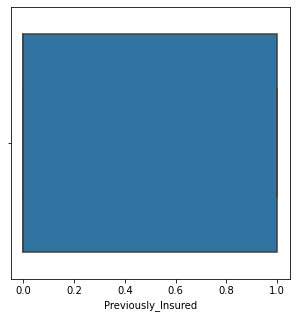

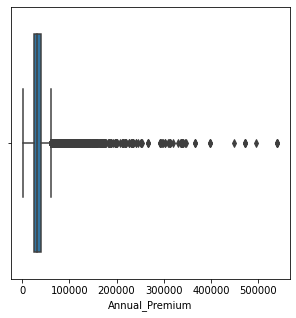

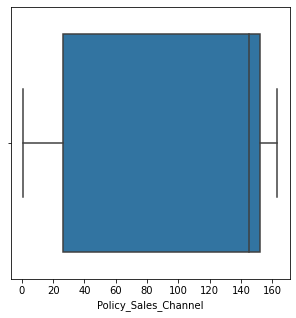

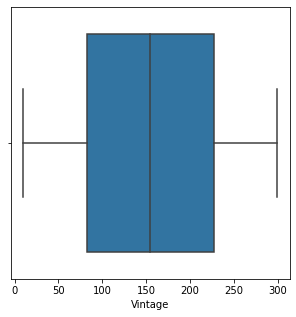

<Figure size 360x360 with 0 Axes>

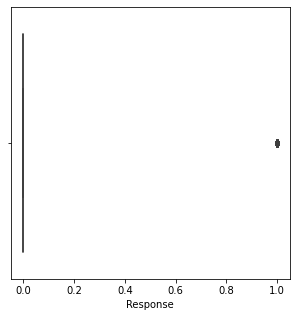

In [14]:
for i,feat in enumerate(data_numeric):
    plt.figure(figsize=(5,5))
    plt.figure(i)
    sns.boxplot(x=df[feat])

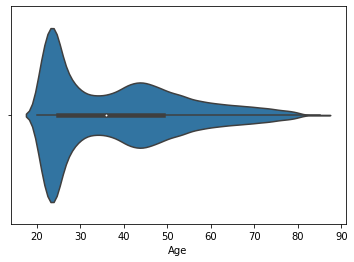

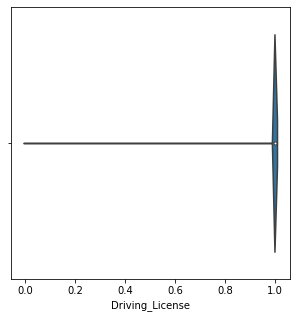

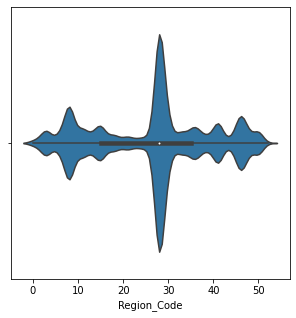

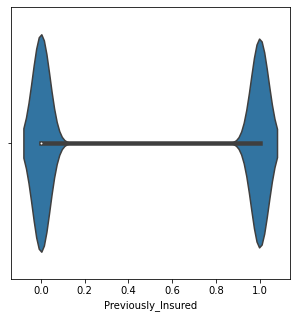

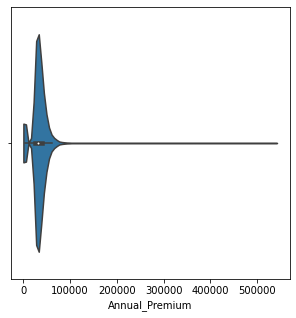

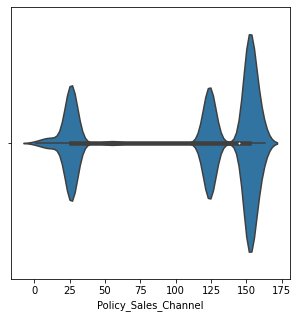

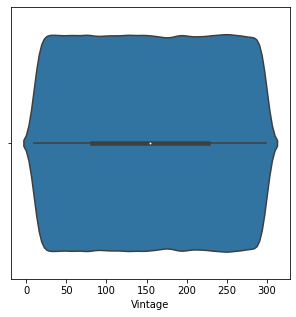

<Figure size 360x360 with 0 Axes>

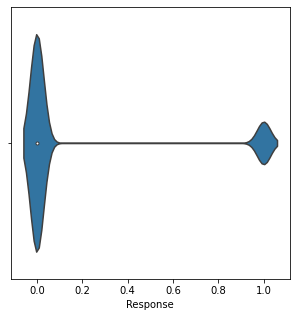

In [15]:
for i,feat in enumerate(data_numeric):
    plt.figure(figsize=(5,5))
    plt.figure(i)
    sns.violinplot(x=df[feat])

## Selecting the Dependent Numerical Features

### By Comparing Correlation And Std Probable Error

In [16]:
numeric_Selc=[]
numeric_NotSelc=[]
def correaltion(column):
   
    r=df[column].corr(df['Response'])
    print("correaltion between {} & Response Is :- {} ".format(column,r))
    std_error=(1-(r**2))/12 #np.sqrt(len(df_numeric))
    print('Std Error:- ',std_error)
    prob_error=0.6745*std_error
    print("Std Probable Error :- ", prob_error)

    if r>(prob_error):
        numeric_Selc.append(column)
        
    print("Relation Exist =>",numeric_Selc)
    
#     else:
#         numeric_NotSelc.append(column)
#     print('Relation Does Not Exist =>',numeric_NotSelc)
        
    return r

In [17]:
for i in data_numeric.columns:
    correaltion(i)

correaltion between Age & Response Is :- 0.13389764284827746 
Std Error:-  0.08183928510330626
Std Probable Error :-  0.055200597802180076
Relation Exist => ['Age']
correaltion between Driving_License & Response Is :- 0.01294421168859565 
Std Error:-  0.0833193706153134
Std Probable Error :-  0.05619891548002889
Relation Exist => ['Age']
correaltion between Region_Code & Response Is :- 0.01167169708698168 
Std Error:-  0.08332198095725914
Std Probable Error :-  0.056200676155671286
Relation Exist => ['Age']
correaltion between Previously_Insured & Response Is :- -0.4313186145705713 
Std Error:-  0.06783035439374357
Std Probable Error :-  0.04575157403858004
Relation Exist => ['Age']
correaltion between Annual_Premium & Response Is :- 0.030580644224557512 
Std Error:-  0.08325540201656759
Std Probable Error :-  0.05615576866017483
Relation Exist => ['Age']
correaltion between Policy_Sales_Channel & Response Is :- -0.18512991794316366 
Std Error:-  0.08047724279019645
Std Probable Error 

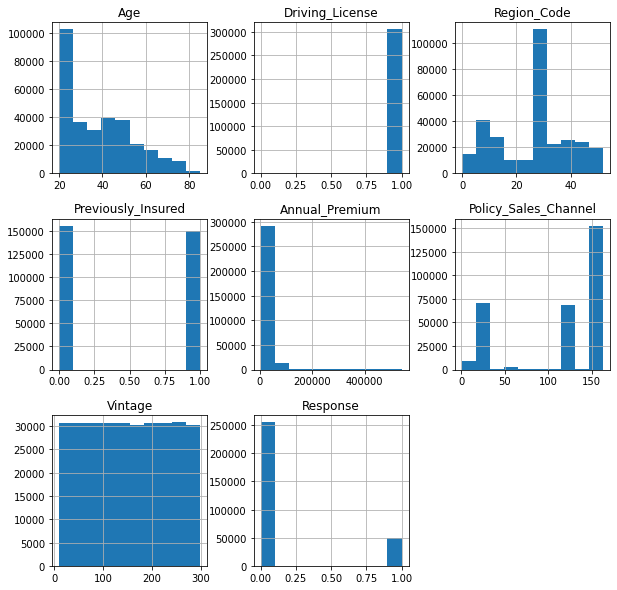

In [18]:
numeric_plot=df[df_numeric[1:]].hist(figsize=(10,10))

In [145]:
# df[df['Gender']=='Male']['Gender']
df[df.Age==80].shape

(709, 12)

In [20]:
# df[['Vehicle_Damage','Age','Driving_License']].groupby(['Gender'])

In [21]:
# df.Driving_License.value_counts()
x=df.groupby(['Vehicle_Damage',df[df["Gender"]=="Female"]['Gender'] ])['Vintage'] 
# x=df.groupby('Driving_License') ["Age"]
    

In [22]:
# pd.DataFrame(x).head(100)
# df[df["Gender"]=="Male"]['Gender']

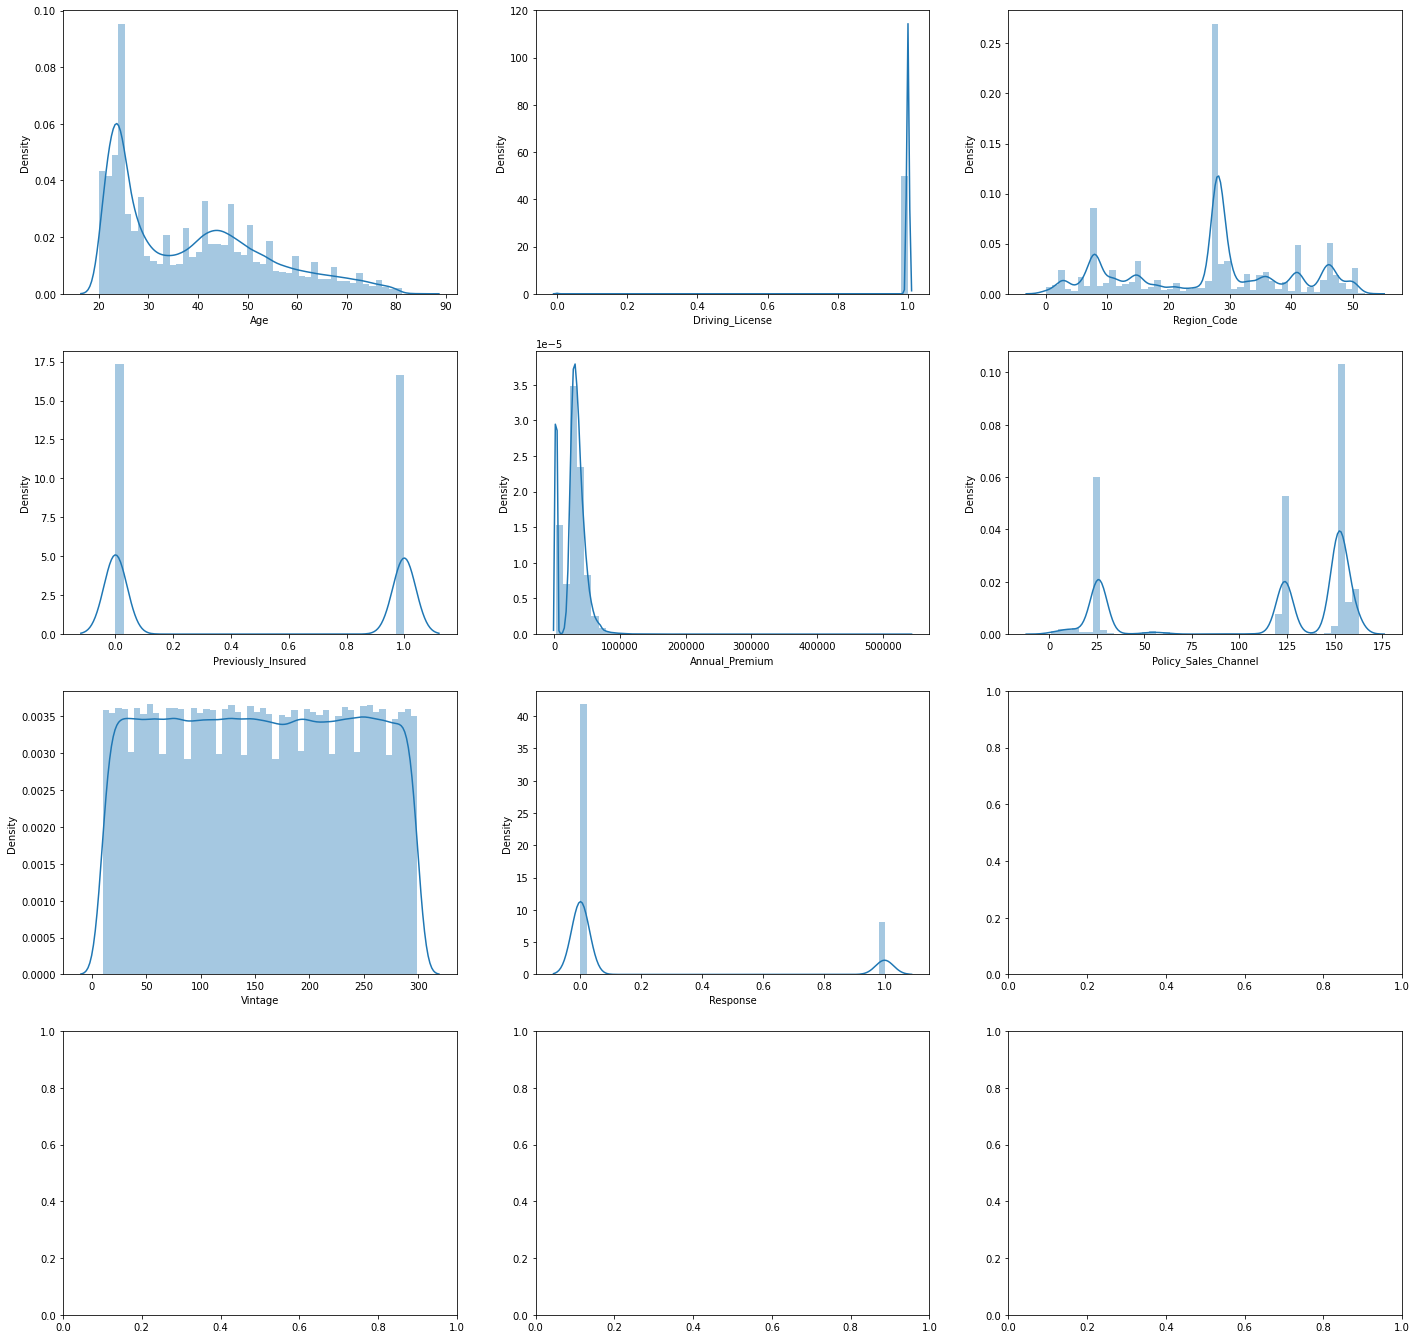

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(24,24))

for i, column in enumerate(data_numeric.columns):
    sns.distplot(df[column],ax=axes[i//3,i%3])

# # Understanding The Data For Categorical Variables


In [24]:
features_categorical=[features for features in df if df[features].dtypes=='O']
print('No. of Categorical features are :-{}'.format(len(features_categorical)))
# print(type(fetures_numeric))

data_categorical=df[features_categorical].copy()
# data_categorical=data_categorical.concat([dataset['price']])
# data_categorical=pd.concat([data_categorical,dataset['price']],axis=1)

data_categorical.head()

No. of Categorical features are :-3


,Gender,Vehicle_Age,Vehicle_Damage
0,Male,< 1 Year,No
1,Male,< 1 Year,No
2,Male,1-2 Year,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [25]:
df['Vehicle_Age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [26]:
for features in features_categorical:
    print('The feature is => {} & The No. of Categorical Features are :- {}'.format(features,len(data_categorical[features].unique())))

The feature is => Gender & The No. of Categorical Features are :- 2
The feature is => Vehicle_Age & The No. of Categorical Features are :- 3
The feature is => Vehicle_Damage & The No. of Categorical Features are :- 2


In [27]:
from sklearn import preprocessing

lbr=preprocessing.LabelEncoder()

def encoding(col):
    data_categorical[col]=lbr.fit_transform(df[col])
    return data_categorical[col]

In [28]:
# data_categorical['Vehicle_Age'].unique()

### In Gender 1 is Male 0 is Female, In Vehicle_Age 1 is < 1 years,0: 1-2 years, 2: >2 yrs, In Vehicle_Damage 0: No ,1: yes

In [29]:
for col in features_categorical:
    encoding(col)

In [30]:
data_categorical.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,1,1,0
1,1,1,0
2,1,0,1
3,1,1,0
4,0,1,0


In [31]:
# Merged the numerical and Categorical Data
df_merge=pd.concat([data_categorical,data_numeric],axis=1)

In [32]:
df_merge.head()

,Gender,Vehicle_Age,Vehicle_Damage,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,0,30,1,28.0,1,60954.0,152.0,127,0
1,1,1,0,26,1,6.0,1,24532.0,152.0,216,0
2,1,0,1,40,1,0.0,0,2630.0,47.0,220,0
3,1,1,0,25,1,8.0,1,44259.0,152.0,223,0
4,0,1,0,26,1,28.0,1,33615.0,152.0,194,0


In [33]:
temp=df_merge['Response'].value_counts().to_dict()

Acutal Distribution of Data is

In [34]:
# data_numeric
for i in temp.values():
    print('{:.2f} %'.format(i/sum(temp.values()) *100))

83.66 %
16.34 %


### Splitting the Data

In [35]:
X=df_merge.iloc[:,:-1]
y=df_merge['Response']

from sklearn.model_selection import train_test_split

X_train,x_test, Y_train,y_test =train_test_split(X,y,test_size=0.20, random_state=101)


In [36]:
X_train.shape

(244578, 10)

In [37]:
Y_train.shape

(244578,)

## Sampling

In [38]:
X_total=df_merge.iloc[:,:-1]
Y_total=df_merge['Response']

In [39]:
X_total.shape

(305723, 10)

In [40]:
Y_total.shape

(305723,)

In [41]:
for i in temp.values():
    print('{:.2f} %'.format(i/sum(temp.values()) *100))

83.66 %
16.34 %


## Using Imblearn

In [42]:
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from collections import Counter

In [43]:
os=RandomUnderSampler(sampling_strategy=0.4) # Downsamping the data in the 40:60 ratio

In [44]:
X_total_train,Y_total_train=os.fit_resample(X_total,Y_total)

In [45]:
temp1=Counter(Y_total_train)
temp1

Counter({0: 124897, 1: 49959})

In [46]:
for i in temp1.values():
    print('{:.2f} %'.format(i/sum(temp.values()) *100))78

40.85 %
16.34 %


In [47]:
ns=NearMiss(sampling_strategy=0.4)

In [48]:
x_ns,y_ns=ns.fit_resample(X_total,Y_total)

In [49]:
temp2=Counter(y_ns)
temp2

Counter({0: 124897, 1: 49959})

In [50]:
for i in temp1.values():
    print('{:.2f} %'.format(i/sum(temp.values()) *100))

40.85 %
16.34 %


In [51]:
Counter(df_merge['Response'])

Counter({0: 255764, 1: 49959})

## Downsampling Manually 

In [52]:
from sklearn.utils import    

### Desired Probability Distribution

### We can enter our desired probability distribution of the class and can either upsample or downsample them

In [53]:
a=eval(input('Enter the % of Data required for class 0 :- '))/100
Prob_class_distribution = {0  : a,              # Response 0  
                                  1   : 1-a,   # Response 1 
                                  
                                 } 

Enter the % of Data required for class 0 :- 50


In [54]:
classes=Prob_class_distribution.keys()

In [55]:
act=df_merge['Response'].value_counts().to_dict()
act

{0: 255764, 1: 49959}

### Actucal probability distribution

In [56]:
for key,value in act.items():
    print(f'Class {key} Data Points:- {value}')
    print('{:.2f} %'.format(value/sum(act.values()) *100))

Class 0 Data Points:- 255764
83.66 %
Class 1 Data Points:- 49959
16.34 %


### Checking the Data Points

In [57]:
Min_data=min(act.values())
Max_data=max(act.values())
max_class=max(act.keys(), key=(lambda key: act[key]))
min_class=min(act.keys(), key=(lambda key: act[key]))
total_data_pts=sum(act.values())

## ## Downsampling

In [58]:
downsample_data=pd.DataFrame()
for c in classes:
    
    if not c==min_class:
        a=int(Prob_class_distribution[c]/Prob_class_distribution[min_class]* Min_data)
#         n=temp[c]-a
        print('C-->',c,':',a)
        sample_data=resample(df_merge[df_merge['Response']==c],n_samples=a)
        downsample_data=pd.concat([downsample_data,sample_data],axis=0)
        
        
    else:
        downsample_data=pd.concat([downsample_data,df_merge[df_merge['Response']==c]],axis=0)

C--> 0 : 49959


In [59]:
down_prob=downsample_data['Response'].value_counts().to_dict()
down_prob

{0: 49959, 1: 49959}

### Desired probability distribution

In [60]:
for key, value in down_prob.items():
    print(f'Class {key} Data Points:- {value}')
    print('{:.2f} %'.format(value / (sum(down_prob.values()))*100))

Class 0 Data Points:- 49959
50.00 %
Class 1 Data Points:- 49959
50.00 %


# Upsampling 

In [68]:
Oversampled_data=pd.DataFrame()
for c in classes:
    
    if not c==max_class:
        a=int(Prob_class_distribution[c]/Prob_class_distribution[max_class] * Max_data)
        n=temp[c]-a
        print('C-->',c,':',a)
        sample_data=resample(df_merge[df_merge['Response']==c],n_samples=a)
        Oversampled_data=pd.concat([Oversampled_data,sample_data],axis=0)
        
        
    else:
        Oversampled_data=pd.concat([Oversampled_data,df_merge[df_merge['Response']==c]],axis=0)

C--> 1 : 255764


In [69]:
up_prob=Oversampled_data['Response'].value_counts().to_dict()

In [70]:
for key, value in up_prob.items():
    print(f'Class {key} No. OF Data Points:- {value}')
    print('Probability Distribution Of Data {:.2f} %'.format(value / (sum(up_prob.values()))*100))

Class 0 No. OF Data Points:- 255764
Probability Distribution Of Data 50.00 %
Class 1 No. OF Data Points:- 255764
Probability Distribution Of Data 50.00 %


## Model

In [71]:
from sklearn.model_selection import KFold,cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
from sklearn.metrics import roc_curve,precision_recall_curve,auc,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [103]:
accuracies={}

## Decision Tree

In [72]:
model=DecisionTreeClassifier(criterion='gini',   
    max_depth=150,
    min_samples_split=2,
    min_samples_leaf=10,)

In [73]:
X = downsample_data.iloc[:,:-1]
y = downsample_data.iloc[:,-1]

In [105]:
# X.head()
model.fit(X,y)
# model.score(X,y)
acc = model.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 87.25%


In [106]:
pred_dtc=model.predict(X)
dtc_rep=classification_report(y,pred_dtc)
print(dtc_rep)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     49959
           1       0.85      0.90      0.88     49959

    accuracy                           0.87     99918
   macro avg       0.87      0.87      0.87     99918
weighted avg       0.87      0.87      0.87     99918



# Cross Validation

In [75]:
k = 3
kf_val = KFold(n_splits=k, random_state=110,shuffle=True)

In [76]:
res=cross_val_score(model,X,y,cv=kf_val)
print(res)
print(np.mean(res))

[0.80006605 0.80733201 0.8026782 ]
0.8033587541784263


### Executing Decision Tree

In [77]:
acc_score=[]
for train_index , test_index in kf_val.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
     
    model.fit(X_train,y_train)
#     pickle.dump((model), open('D:\Decision_TREE_PC.pkl', 'wb'))    
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)  #model.score(X_test,y_test)
    acc_score.append(acc)
    
    rep=classification_report(pred_values , y_test)
    print(rep)
    print(f'No.of Data Points Of train:-{len(train_index)} & No.of Data Points Of test:-{len(test_index)}')
     

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     15878
           1       0.82      0.79      0.80     17428

    accuracy                           0.80     33306
   macro avg       0.80      0.80      0.80     33306
weighted avg       0.80      0.80      0.80     33306

No.of Data Points Of train:-66612 & No.of Data Points Of test:-33306
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     15771
           1       0.83      0.79      0.81     17535

    accuracy                           0.81     33306
   macro avg       0.81      0.81      0.81     33306
weighted avg       0.81      0.81      0.81     33306

No.of Data Points Of train:-66612 & No.of Data Points Of test:-33306
              precision    recall  f1-score   support

           0       0.77      0.82      0.80     15681
           1       0.83      0.78      0.81     17625

    accuracy                           0.80 

In [78]:
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.800186152645169, 0.8063411997838227, 0.8020176544766708]
Avg accuracy : 0.8028483356352208


## Execution of SVM

In [ ]:
from sklearn.svm import SVC
vector_machine=SVC(C=1.0,
    kernel='rbf',
    degree=3,
    gamma=0.001,
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

In [ ]:
svm_acc_score=[]
for train_index , test_index in kf_val.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
     
    vector_machine.fit(X_train,y_train)
#     pickle.dump((vector_machine), open('D:\SVM_PC.pkl', 'wb'))    
    pred_values = vector_machine.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)  #model.score(X_test,y_test)
    svm_acc_score.append(acc)
    
    rep=classification_report(pred_values , y_test)
    cm=confusion_matrix(pred_values , y_test)
    print(rep)
    print('Confusion Matrix',cm)
    

# Without Cross Validation

## Random Forest 

In [104]:
# accuracies={}

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X,y)

pred_rf=rf.predict(X)

acc = rf.score(X,y)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.99%


In [118]:
pred_rf=rf.predict(X)
rf_rep=classification_report(y,pred_rf)
print(rf_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49959
           1       1.00      1.00      1.00     49959

    accuracy                           1.00     99918
   macro avg       1.00      1.00      1.00     99918
weighted avg       1.00      1.00      1.00     99918



In [119]:
print('Random Forest Test AUC-ROC score :-',roc_auc_score(y,pred_rf))
pred_rf_train=rf.predict(X)
print('Random Forest train AUC-ROC score :-',roc_auc_score(y,pred_rf_train))

Random Forest Test AUC-ROC score :- 0.9999199343461638
Random Forest train AUC-ROC score :- 0.9999199343461638


# Xg Boost

In [120]:
import xgboost as Xgb
# from sklearn.model_selection import GridSearchCV 
xgb = Xgb.XGBClassifier(learning_rate=0.3)

# xgb_grid = GridSearchCV(xgb,parameters,cv = 2)
# xgb_grid.fit(X,y)
# pred = xgb_grid.predict(X_test)
xgb.fit(X,y)
acc = xgb.score(X,y)*100
accuracies['XG-Boost'] = acc
print("XG-Boost Algorithm Accuracy Score : {:.2f}%".format(acc))

[16:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG-Boost Algorithm Accuracy Score : 85.75%


In [121]:
pred_xgb=xgb.predict(X)
xgb_rep=classification_report(y,pred_xgb)
print(xgb_rep)

              precision    recall  f1-score   support

           0       0.93      0.78      0.84     49959
           1       0.81      0.94      0.87     49959

    accuracy                           0.86     99918
   macro avg       0.87      0.86      0.86     99918
weighted avg       0.87      0.86      0.86     99918



In [85]:
print('XgBoost Test AUC-ROC score :-',roc_auc_score(y,pred_xgb))
pred_xgb_train=xgb.predict(X)
print('XgBoost Train AUC-ROC score :-',roc_auc_score(y,pred_xgb_train))

XgBoost Test AUC-ROC score :- 0.8574731279649311
XgBoost Train AUC-ROC score :- 0.8574731279649311


In [86]:
# !pip install xgboost

# Ada Boost

In [111]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

adf = AdaBoostClassifier(n_estimators=1000, random_state=2)
adf.fit(X,y)
acc = adf.score(X,y)*100
accuracies['AdaBoost'] = acc
print("AdaBoost Algorithm Accuracy Score : {:.2f}%".format(acc))


AdaBoost Algorithm Accuracy Score : 83.76%


In [110]:
pred_adf=adf.predict(X)
adf_rep=classification_report(y,pred_xgb)
print(adf_rep)

              precision    recall  f1-score   support

           0       0.93      0.78      0.84     49959
           1       0.81      0.94      0.87     49959

    accuracy                           0.86     99918
   macro avg       0.87      0.86      0.86     99918
weighted avg       0.87      0.86      0.86     99918



In [89]:
print('AdaBoost Test AUC-ROC score :-',roc_auc_score(y,pred_xgb))
pred_adf_train=adf.predict(X)
print('AdaBoost Train AUC-ROC score :-',roc_auc_score(y,pred_xgb_train))

AdaBoost Test AUC-ROC score :- 0.8574731279649311
AdaBoost Train AUC-ROC score :- 0.8574731279649311


# Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X,y)

acc = nb.score(X,y)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 81.89%


In [114]:
pred_nb=nb.predict(X)
nb_rep=classification_report(y,pred_nb)
print(nb_rep)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     49959
           1       0.76      0.93      0.84     49959

    accuracy                           0.82     99918
   macro avg       0.84      0.82      0.82     99918
weighted avg       0.84      0.82      0.82     99918



In [115]:
print('Naive bayes Test AUC-ROC score :-',roc_auc_score(y,pred_nb))
pred_nb_train=nb.predict(X)
print('Naive Bayes train AUC-ROC score :-',roc_auc_score(y,pred_nb_train))

Naive bayes Test AUC-ROC score :- 0.8188814828159091
Naive Bayes train AUC-ROC score :- 0.8188814828159091


# SVM

In [93]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
# accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 54.49%


In [94]:
pred_svm=svm.predict(X)
svm_rep=classification_report(y,pred_svm)
print(svm_rep)

KeyboardInterrupt: 

In [ ]:
print('SVM Test AUC-ROC score :-',roc_auc_score(y,pred_svm))
pred_svm_train=svm.predict(X)
print('Svm train AUC-ROC score :-',roc_auc_score(y_train,pred_svm_train))

# Comparing the models

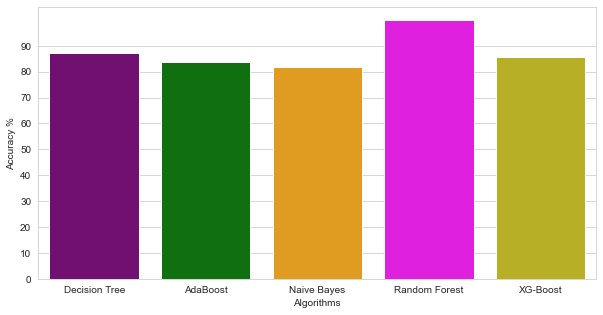

In [122]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [133]:
# cm_lr = confusion_matrix(y_test,pred_lr)
# cm_knn = confusion_matrix(y,pred_knn)
# cm_svm = confusion_matrix(y,pred_svm)
cm_nb = confusion_matrix(y,pred_nb)
cm_dtc = confusion_matrix(y,pred_dtc)
cm_rf = confusion_matrix(y,pred_rf)
cm_adf = confusion_matrix(y,pred_adf) 
cm_xgb = confusion_matrix(y,pred_xgb)


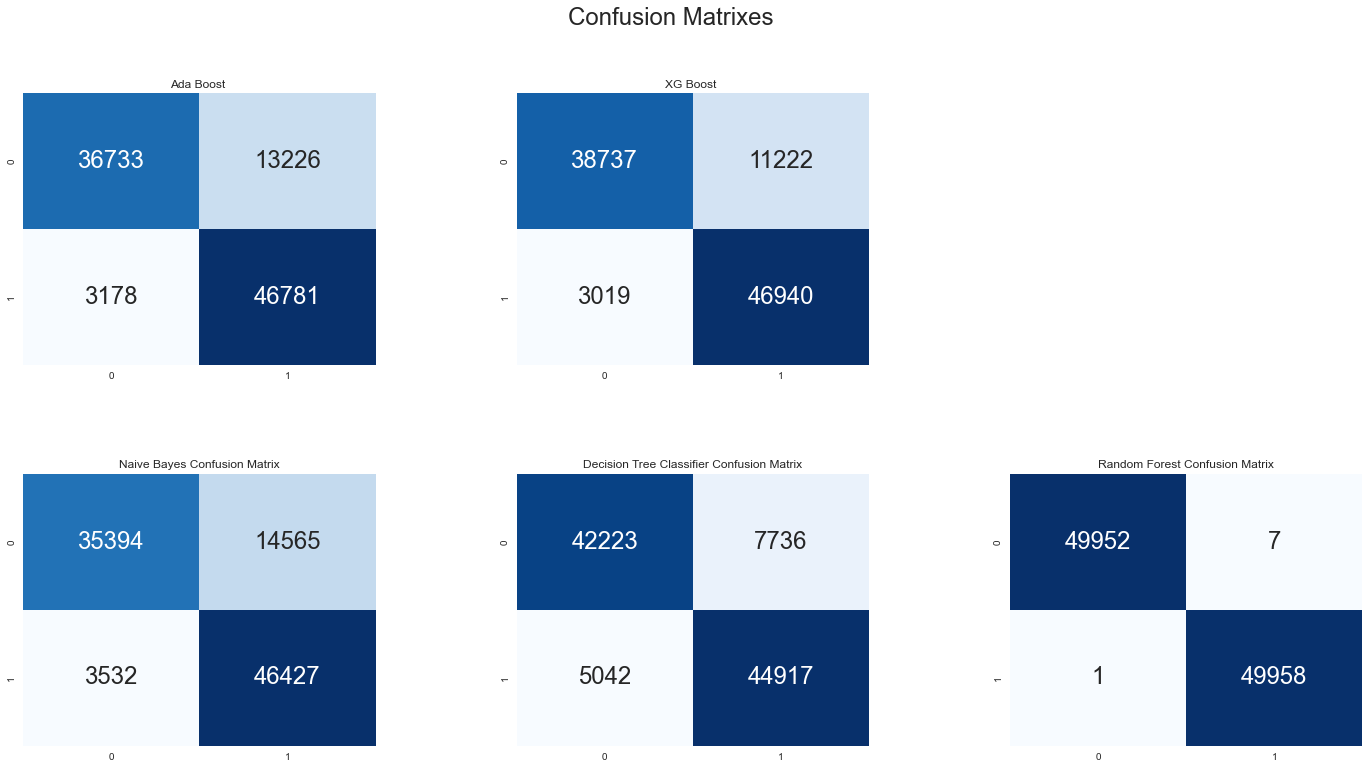

In [134]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


# plt.subplot(2,3,3)
# plt.title("Support Vector Machine Confusion Matrix")
# sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,1)
plt.title("Ada Boost ")
sns.heatmap(cm_adf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("XG Boost ")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## selecting the best threshold for maximum accuracy

In [135]:
pred=[]
for model in [model,rf,nb,xgb,adf]: #svm
    pred.append(pd.Series(model.predict(X)))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y,final_prediction)))

Ensemble test roc-auc: 0.978508054260171


In [136]:
final_prediction

0        0.0
1        0.8
2        0.0
3        0.0
4        0.0
        ... 
99913    1.0
99914    1.0
99915    1.0
99916    0.8
99917    0.4
Length: 99918, dtype: float64

In [137]:
fpr, tpr, thresholds = roc_curve(y, final_prediction)
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [138]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
2,0.8,0.948868
4,0.4,0.864499
3,0.6,0.858754
5,0.2,0.854040
6,0.0,0.845213


In [139]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

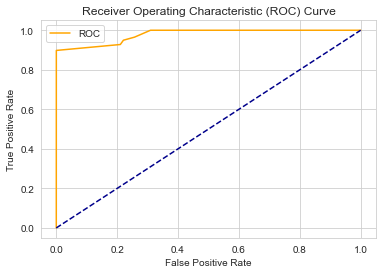

In [140]:
plot_roc_curve(fpr,tpr)